In [5]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import csv
import glob
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

This project is centered around global pollution and coral reef health. The files for this project are large. I included all data that was included in the file download in individual folders, keeping original naming for organization. I will add the links to each site. All credit to the wonderful people who collected this vast amount of data, I look forward to gaining valuable insights from it. 

We are going to start by looking at our data. We will them combine where we can, likely on the country level. Let's start with HDI (Human Development Index). 

In [6]:
hdi = pd.read_csv("HDR25_Statistical_Annex_HDI_Table.csv", skiprows=4, encoding="latin1")

In [7]:
hdi.head(10)

,Unnamed: 0,Unnamed: 1,Human Development Index (HDI),Unnamed: 3,Life expectancy at birth,Unnamed: 5,Expected years of schooling,Unnamed: 7,Mean years of schooling,Unnamed: 9,Gross national income (GNI) per capita,Unnamed: 11,GNI per capita rank minus HDI rank,Unnamed: 13,HDI rank,Unnamed: 15
0,HDI rank,Country,Value,NaN,(years),NaN,(years),NaN,(years),NaN,(2021 PPP $),NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2023,NaN,2023,NaN,2023,a,2023,a,2023,NaN,2023,b,2022,NaN
2,NaN,Very high human development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Iceland,0.972,NaN,82.7,NaN,18.9,c,13.9,d,"69,117",NaN,12,NaN,3,NaN
4,2,Norway,0.970,NaN,83.3,NaN,18.8,c,13.1,e,"112,710",f,0,NaN,1,NaN
5,2,Switzerland,0.970,NaN,84.0,NaN,16.7,NaN,13.9,e,"81,949",f,5,NaN,2,NaN
6,4,Denmark,0.962,NaN,81.9,NaN,18.7,c,13.0,e,"76,008",f,4,NaN,4,NaN
7,5,Germany,0.959,NaN,81.4,NaN,17.3,NaN,14.3,e,"64,053",NaN,13,NaN,6,NaN
8,5,Sweden,0.959,NaN,83.3,NaN,19.0,c,12.7,e,"66,102",NaN,10,NaN,4,NaN
9,7,Australia,0.958,NaN,83.9,NaN,20.7,c,12.9,NaN,"58,277",NaN,14,NaN,8,NaN


In [8]:
hdi.drop([ 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 13'], axis=1, inplace=True) 
hdi.head()

,Unnamed: 0,Unnamed: 1,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank,Unnamed: 15
0,HDI rank,Country,Value,(years),(years),(years),(2021 PPP $),NaN,NaN,NaN
1,NaN,NaN,2023,2023,2023,2023,2023,2023,2022,NaN
2,NaN,Very high human development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Iceland,0.972,82.7,18.9,13.9,"69,117",12,3,NaN
4,2,Norway,0.970,83.3,18.8,13.1,"112,710",0,1,NaN


In [9]:
hdi.rename(columns={'Unnamed: 0': 'HDI Rank', 'Unnamed: 1': 'Country'}, inplace=True)
hdi.drop(0, axis=0, inplace=True) 
hdi.head()

,HDI Rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank,Unnamed: 15
1,NaN,NaN,2023,2023,2023,2023,2023,2023,2022,NaN
2,NaN,Very high human development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Iceland,0.972,82.7,18.9,13.9,"69,117",12,3,NaN
4,2,Norway,0.970,83.3,18.8,13.1,"112,710",0,1,NaN
5,2,Switzerland,0.970,84.0,16.7,13.9,"81,949",5,2,NaN


In [10]:
hdi.drop(1, axis=0, inplace=True) 
hdi.drop(2, axis=0, inplace=True) 
hdi.drop('Unnamed: 15', axis=1, inplace=True) 
hdi.head()

,HDI Rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank
3,1,Iceland,0.972,82.7,18.9,13.9,"69,117",12,3
4,2,Norway,0.970,83.3,18.8,13.1,"112,710",0,1
5,2,Switzerland,0.970,84.0,16.7,13.9,"81,949",5,2
6,4,Denmark,0.962,81.9,18.7,13.0,"76,008",4,4
7,5,Germany,0.959,81.4,17.3,14.3,"64,053",13,6


In [11]:
hdi.set_index('Country', inplace=True)

In [19]:
hdi.head()

,HDI Rank,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank
Country,,,,,,,,
Iceland,1,0.972,82.7,18.9,13.9,"69,117",12,3
Norway,2,0.970,83.3,18.8,13.1,"112,710",0,1
Switzerland,2,0.970,84.0,16.7,13.9,"81,949",5,2
Denmark,4,0.962,81.9,18.7,13.0,"76,008",4,4
Germany,5,0.959,81.4,17.3,14.3,"64,053",13,6


All the measurments below (mercury, particulate, NOx, oc, SO2) are in units of t (metric tons). I will keep the unit off so that we can use this as numeric data. Data sourced from EDGAR at https://edgar.jrc.ec.europa.eu/country_profile . 

The mercury measurement here is divalent mercury, or mercuy that is water soluable. It is more likely to impact organisms and ecosystems due to it's increased ability to be absorbed. 

In [21]:
mercury = pd.read_csv('Hg_D.csv')
mercury.head()

,Category,Agriculture,Buildings,Power industry,Transport,Waste,Other industrial combustion,Other
0,1970,NaN,5.74,43.15,3.00,87.55,33.13,94.58
1,1971,NaN,5.56,43.41,3.09,86.66,27.50,93.84
2,1972,NaN,5.61,45.03,3.27,85.70,27.71,98.89
3,1973,NaN,5.66,47.88,3.48,84.67,28.14,104.86
4,1974,NaN,5.68,48.43,3.43,83.52,27.83,105.04


In [40]:
mercury.isnull().sum()

Category                        0
Agriculture                    53
Buildings                       0
Power industry                  0
Transport                       0
Waste                           0
Other industrial combustion     0
Other                           0
dtype: int64

In [42]:
mercury.shape

(53, 8)

Since there are no values for agriculture, we will fill them with zero. For table structure purposes we won't be removing the row altogether. 

In [45]:
mercury['Agriculture'] = mercury['Agriculture'].fillna(0)

In [47]:
mercury.head()

,Category,Agriculture,Buildings,Power industry,Transport,Waste,Other industrial combustion,Other
0,1970,0.0,5.74,43.15,3.00,87.55,33.13,94.58
1,1971,0.0,5.56,43.41,3.09,86.66,27.50,93.84
2,1972,0.0,5.61,45.03,3.27,85.70,27.71,98.89
3,1973,0.0,5.66,47.88,3.48,84.67,28.14,104.86
4,1974,0.0,5.68,48.43,3.43,83.52,27.83,105.04


In [74]:
mercury = mercury.set_index('Category')
mercury = mercury.rename_axis('Year')
mercury.head()

,Agriculture,Buildings,Power industry,Transport,Waste,Other industrial combustion,Other
Year,,,,,,,
1970,0.0,5.74,43.15,3.00,87.55,33.13,94.58
1971,0.0,5.56,43.41,3.09,86.66,27.50,93.84
1972,0.0,5.61,45.03,3.27,85.70,27.71,98.89
1973,0.0,5.66,47.88,3.48,84.67,28.14,104.86
1974,0.0,5.68,48.43,3.43,83.52,27.83,105.04


Particulate Matter 10, or PM10, can come from both man-made and natural sources. It is important here as it can settle in bodies of water and carry toxic materials. 

In [23]:
particulate = pd.read_csv('PM_10.csv') 
particulate.head()

,Category,Agriculture,Buildings,Power industry,Transport,Waste,Other industrial combustion,Other
0,1970,2807909.89,17792611.38,2096987.28,2026915.10,399986.71,7680553.54,1463569.17
1,1971,2879206.83,17611864.86,2019305.33,2057409.30,398913.05,7107885.36,1469608.30
2,1972,2842122.26,17823370.27,2105281.48,2138737.92,397654.13,7157622.46,1543997.00
3,1973,2991717.87,18054584.25,2165527.34,2255518.63,396065.16,7279404.64,1633192.25
4,1974,3048354.43,18356148.56,2154415.04,2232853.07,393984.92,7334116.39,1628297.64


In [51]:
particulate.isnull().sum()

Category                       0
Agriculture                    0
Buildings                      0
Power industry                 0
Transport                      0
Waste                          0
Other industrial combustion    0
Other                          0
dtype: int64

In [76]:
particulate = particulate.set_index('Category')
particulate = particulate.rename_axis('Year')
particulate.head()

,Agriculture,Buildings,Power industry,Transport,Waste,Other industrial combustion,Other
Year,,,,,,,
1970,2807909.89,17792611.38,2096987.28,2026915.10,399986.71,7680553.54,1463569.17
1971,2879206.83,17611864.86,2019305.33,2057409.30,398913.05,7107885.36,1469608.30
1972,2842122.26,17823370.27,2105281.48,2138737.92,397654.13,7157622.46,1543997.00
1973,2991717.87,18054584.25,2165527.34,2255518.63,396065.16,7279404.64,1633192.25
1974,3048354.43,18356148.56,2154415.04,2232853.07,393984.92,7334116.39,1628297.64


NOx refers to NO and NO2. These are produced through combustion. Nitrogen and oxygen react to produce this gas in the atmosphere. It can cause acid rain. When it is depositied into water, the excessive nitrogen can cause algae blooms that deplete oxygen available to marine life.

In [61]:
nox = pd.read_csv('NOx.csv')
nox.head()

,Category,Agriculture,Buildings,Power industry,Transport,Waste,Other industrial combustion,Other
0,1970,2923089.88,4352909.03,11876430.25,37594980.83,60065.19,13856908.39,217315.78
1,1971,2967127.74,4338121.06,12212474.15,38452244.94,61398.77,12940422.63,218280.94
2,1972,2953022.77,4458629.05,13223866.61,40434493.76,62769.27,13359395.59,228619.25
3,1973,3042368.73,4523792.16,14411427.95,42672793.98,64156.37,14066517.16,238395.78
4,1974,3065497.43,4488575.32,14467067.82,42119920.77,65534.76,14036857.11,243557.71


In [63]:
nox.isnull().sum()

Category                       0
Agriculture                    0
Buildings                      0
Power industry                 0
Transport                      0
Waste                          0
Other industrial combustion    0
Other                          0
dtype: int64

In [78]:
nox = nox.set_index('Category')
nox = nox.rename_axis('Year')
nox.head()

,Agriculture,Buildings,Power industry,Transport,Waste,Other industrial combustion,Other
Year,,,,,,,
1970,2923089.88,4352909.03,11876430.25,37594980.83,60065.19,13856908.39,217315.78
1971,2967127.74,4338121.06,12212474.15,38452244.94,61398.77,12940422.63,218280.94
1972,2953022.77,4458629.05,13223866.61,40434493.76,62769.27,13359395.59,228619.25
1973,3042368.73,4523792.16,14411427.95,42672793.98,64156.37,14066517.16,238395.78
1974,3065497.43,4488575.32,14467067.82,42119920.77,65534.76,14036857.11,243557.71


Organic carbon is part of fine particulate matter. It can deposit into oceans like the above particulate matter. 

In [29]:
oc = pd.read_csv('organic_carbon.csv') 
oc.head()

,Category,Agriculture,Buildings,Power industry,Transport,Waste,Other industrial combustion,Other
0,1970,1256316.95,6367562.22,91133.30,316596.42,34818.54,801420.29,14502.0
1,1971,1271178.26,6243010.68,88309.52,323479.43,34662.32,701141.27,14538.0
2,1972,1231410.97,6273190.06,91760.08,339073.77,34487.70,714694.12,14574.0
3,1973,1311089.98,6298645.19,94509.70,358855.33,34281.22,722487.45,14610.0
4,1974,1334930.25,6350698.59,94015.18,359427.89,34027.87,714317.84,14646.0


In [58]:
oc.isnull().sum()

Category                       0
Agriculture                    0
Buildings                      0
Power industry                 0
Transport                      0
Waste                          0
Other industrial combustion    0
Other                          0
dtype: int64

In [80]:
oc = oc.set_index('Category')
oc = oc.rename_axis('Year')
oc.head()

,Agriculture,Buildings,Power industry,Transport,Waste,Other industrial combustion,Other
Year,,,,,,,
1970,1256316.95,6367562.22,91133.30,316596.42,34818.54,801420.29,14502.0
1971,1271178.26,6243010.68,88309.52,323479.43,34662.32,701141.27,14538.0
1972,1231410.97,6273190.06,91760.08,339073.77,34487.70,714694.12,14574.0
1973,1311089.98,6298645.19,94509.70,358855.33,34281.22,722487.45,14610.0
1974,1334930.25,6350698.59,94015.18,359427.89,34027.87,714317.84,14646.0


Suflur dioxide can come from human sources and natural ones, like volcanic eruptions. It has similar effects as NOx on ocean ecosystems. 

In [65]:
so2 = pd.read_csv('SO2.csv')
so2.head()

,Category,Agriculture,Buildings,Power industry,Transport,Waste,Other industrial combustion,Other
0,1970,130113.21,15803745.49,38499933.46,9219860.06,69118.26,29299212.20,3551601.69
1,1971,131058.11,15447547.16,39453247.50,9293443.23,69731.56,25587383.31,3544377.27
2,1972,127084.95,15653747.23,42823030.67,9564876.79,70345.70,26052527.56,3615453.08
3,1973,135929.36,15983759.37,46860005.66,10024883.76,70939.96,27101639.52,3752646.95
4,1974,138450.05,15558116.48,47127681.67,9771066.54,71490.01,26713775.59,3833724.33


In [67]:
so2.isnull().sum()

Category                       0
Agriculture                    0
Buildings                      0
Power industry                 0
Transport                      0
Waste                          0
Other industrial combustion    0
Other                          0
dtype: int64

In [82]:
so2 = so2.set_index('Category')
so2 = so2.rename_axis('Year')
so2.head()

,Agriculture,Buildings,Power industry,Transport,Waste,Other industrial combustion,Other
Year,,,,,,,
1970,130113.21,15803745.49,38499933.46,9219860.06,69118.26,29299212.20,3551601.69
1971,131058.11,15447547.16,39453247.50,9293443.23,69731.56,25587383.31,3544377.27
1972,127084.95,15653747.23,42823030.67,9564876.79,70345.70,26052527.56,3615453.08
1973,135929.36,15983759.37,46860005.66,10024883.76,70939.96,27101639.52,3752646.95
1974,138450.05,15558116.48,47127681.67,9771066.54,71490.01,26713775.59,3833724.33


Wonderfully, our data is all structured the same and is very clean. 

In [112]:
particulate = particulate.rename(columns=lambda c: c if c == "Year" else f"{c}_PM")
nox = nox.rename(columns=lambda c: c if c == "Year" else f"{c}_NOx")
oc = oc.rename(columns=lambda c: c if c == "Year" else f"{c}_OC")
so2 = so2.rename(columns=lambda c: c if c == "Year" else f"{c}_SO2")
mercury = mercury.rename(columns=lambda c: c if c == "Year" else f"{c}_Hg")
pol = mercury.merge(particulate, on="Year", how="inner").merge(nox, on="Year", how="inner").merge(oc, on="Year", how="inner").merge(so2, on="Year", how="inner")

I got the coral reef data from BCO-DMO. Here is the link: https://www.bco-dmo.org/
Thank you to everyone who collected this valuable data. 

Here are some definitions to help understand the data: 
1. SSTA - Sea Surface Temperature (SST) Anomally, the difference the SST for that location (positive = warmer than usual, negative = cooler than usual)
2. DHW - the cumulative heat stress over 12 weeks
3. TSA - Thermal Stress Anomaly
4. SSTA_Frequency - how often anomalies above the threshold occur
5. SSTA_Standard_Deviation - how variable anomalies are

In [147]:
reef = pd.read_csv('global_bleaching_environmental.csv') 
reef.head()

C:\Users\Miranda\AppData\Local\Temp\ipykernel_30392\2769383666.py:1: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  reef = pd.read_csv('global_bleaching_environmental.csv')


,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.163,-82.5260,Atlantic,nd,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5,0,0,0.74,7.25,0.18,2005-09-15,nd,nd,nd
1,3467,10324754,Donner,-17.575,-149.7833,Pacific,nd,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4,0,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,nd
2,1794,10323866,Donner,18.369,-64.5640,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7,0,0,1.04,11.66,0.26,2006-01-15,nd,nd,nd
3,8647,10328028,Donner,17.760,-64.5680,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4,0,0,0.75,5.64,0.2,2006-04-15,nd,nd,nd
4,8648,10328029,Donner,17.769,-64.5830,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5,0,0,0.92,6.89,0.25,2006-04-15,nd,nd,nd


In [149]:
reef.columns

Index(['Site_ID', 'Sample_ID', 'Data_Source', 'Latitude_Degrees',
       'Longitude_Degrees', 'Ocean_Name', 'Reef_ID', 'Realm_Name',
       'Ecoregion_Name', 'Country_Name', 'State_Island_Province_Name',
       'City_Town_Name', 'Site_Name', 'Distance_to_Shore', 'Exposure',
       'Turbidity', 'Cyclone_Frequency', 'Date_Day', 'Date_Month', 'Date_Year',
       'Depth_m', 'Substrate_Name', 'Percent_Cover', 'Bleaching_Level',
       'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Freq

In [152]:
reef.drop(['Site_ID', 'Sample_ID', 'Reef_ID', 'Cyclone_Frequency', 'Date_Day', 'Data_Source', 'Date', 'Date_Month', 'Site_Comments', 
           'Sample_Comments', 'Bleaching_Comments', 'Ocean_Name', 'Realm_Name', 'Ecoregion_Name', 
           'State_Island_Province_Name', 'City_Town_Name', 'Site_Name'], axis=1, inplace=True) 
reef.head()


,Latitude_Degrees,Longitude_Degrees,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Depth_m,Substrate_Name,Percent_Cover,...,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean
0,23.163,-82.5260,Cuba,8519.23,Exposed,0.0287,2005,10,nd,nd,...,1.83,-2.17,0,1.09,5,0,0,0.74,7.25,0.18
1,-17.575,-149.7833,French Polynesia,1431.62,Exposed,0.0262,1991,14,nd,nd,...,3.00,-1.26,0.25,0.93,4,0,0.26,0.67,4.65,0.19
2,18.369,-64.5640,United Kingdom,182.33,Exposed,0.0429,2006,7,nd,nd,...,2.31,-1.49,7,1.31,7,0,0,1.04,11.66,0.26
3,17.760,-64.5680,United States,313.13,Exposed,0.0424,2006,9.02,nd,nd,...,2.19,-1.49,3,0.94,4,0,0,0.75,5.64,0.2
4,17.769,-64.5830,United States,792.0,Exposed,0.0424,2006,12.50,nd,nd,...,1.87,-1.5,3,1.33,5,0,0,0.92,6.89,0.25


In [154]:
reef.isnull().sum()

Latitude_Degrees                         0
Longitude_Degrees                        0
Country_Name                             0
Distance_to_Shore                        0
Exposure                                 0
Turbidity                                0
Date_Year                                0
Depth_m                                  0
Substrate_Name                           0
Percent_Cover                            0
Bleaching_Level                          0
Percent_Bleaching                        0
ClimSST                                  0
Temperature_Kelvin                       0
Temperature_Mean                         0
Temperature_Minimum                      0
Temperature_Maximum                      0
Temperature_Kelvin_Standard_Deviation    0
Windspeed                                0
SSTA                                     0
SSTA_Standard_Deviation                  0
SSTA_Mean                                0
SSTA_Minimum                             0
SSTA_Maximu

In [157]:
reef.drop(['TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Minimum', 'TSA_Mean', 'TSA_Frequency',
           'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 
           'TSA_DHWMax', 'TSA_DHWMean'], axis=1, inplace=True) 
reef.head()

,Latitude_Degrees,Longitude_Degrees,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Depth_m,Substrate_Name,Percent_Cover,...,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean
0,23.163,-82.5260,Cuba,8519.23,Exposed,0.0287,2005,10,nd,nd,...,-3.56,2.24,0,3.13,17,3,0,1.63,7.88,0.98
1,-17.575,-149.7833,French Polynesia,1431.62,Exposed,0.0262,1991,14,nd,nd,...,-2.73,3.1,0.5,2.77,13.25,2,0.26,1.48,11.41,0.72
2,18.369,-64.5640,United Kingdom,182.33,Exposed,0.0429,2006,7,nd,nd,...,-2.92,2.83,16,4.52,23,3,0,2.45,16.24,1.26
3,17.760,-64.5680,United States,313.13,Exposed,0.0424,2006,9.02,nd,nd,...,-2.77,2.47,22,4.75,24,3,0,2.37,16.73,1.07
4,17.769,-64.5830,United States,792.0,Exposed,0.0424,2006,12.50,nd,nd,...,-2.84,2.3,16,4.16,20,3,0,2.24,13.86,1.16


In [171]:
reef['Substrate_Name'].unique()

array(['nd', 'Hard Coral', 'Nutrient Indicator Algae', 'Fleshy Seaweed'],
      dtype=object)

In [175]:
reef['Bleaching_Level'].unique()

array(['nd', 'Population'], dtype=object)

In [185]:
reef.drop('Bleaching_Level', axis=1, inplace=True) 

In [187]:
reef.drop(['Percent_Cover', 'Distance_to_Shore', 'ClimSST', 'Windspeed'], axis=1, inplace=True) 

In [189]:
reef.head()

,Latitude_Degrees,Longitude_Degrees,Country_Name,Exposure,Turbidity,Date_Year,Depth_m,Substrate_Name,Percent_Bleaching,Temperature_Kelvin,...,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean
0,23.163,-82.5260,Cuba,Exposed,0.0287,2005,10,nd,50.2,302.05,...,-3.56,2.24,0,3.13,17,3,0,1.63,7.88,0.98
1,-17.575,-149.7833,French Polynesia,Exposed,0.0262,1991,14,nd,50.7,303.30,...,-2.73,3.1,0.5,2.77,13.25,2,0.26,1.48,11.41,0.72
2,18.369,-64.5640,United Kingdom,Exposed,0.0429,2006,7,nd,50.9,299.18,...,-2.92,2.83,16,4.52,23,3,0,2.45,16.24,1.26
3,17.760,-64.5680,United States,Exposed,0.0424,2006,9.02,nd,50.9,299.61,...,-2.77,2.47,22,4.75,24,3,0,2.37,16.73,1.07
4,17.769,-64.5830,United States,Exposed,0.0424,2006,12.50,nd,50.9,299.7,...,-2.84,2.3,16,4.16,20,3,0,2.24,13.86,1.16


In [223]:
reef.rename(columns={'Country_Name':'Country'}, inplace=True) 

In [221]:
reef.rename(columns={'Date_Year':'Year'}, inplace=True)


In [114]:
pol.columns

Index(['Agriculture_Hg', 'Buildings_Hg', 'Power industry_Hg', 'Transport_Hg',
       'Waste_Hg', 'Other industrial combustion_Hg', 'Other_Hg',
       'Agriculture_PM', 'Buildings_PM', 'Power industry_PM', 'Transport_PM',
       'Waste_PM', 'Other industrial combustion_PM', 'Other_PM',
       'Agriculture_NOx', 'Buildings_NOx', 'Power industry_NOx',
       'Transport_NOx', 'Waste_NOx', 'Other industrial combustion_NOx',
       'Other_NOx', 'Agriculture_OC', 'Buildings_OC', 'Power industry_OC',
       'Transport_OC', 'Waste_OC', 'Other industrial combustion_OC',
       'Other_OC', 'Agriculture_SO2', 'Buildings_SO2', 'Power industry_SO2',
       'Transport_SO2', 'Waste_SO2', 'Other industrial combustion_SO2',
       'Other_SO2'],
      dtype='object')

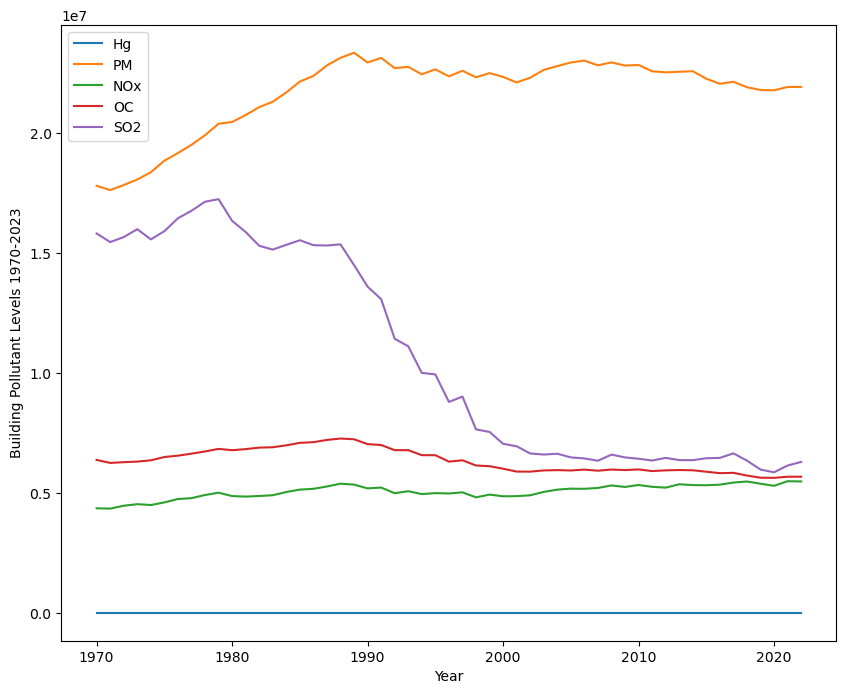

In [128]:
plt.figure(figsize=(10,8))
plt.plot(pol['Buildings_Hg'], label='Hg')
plt.plot(pol['Buildings_PM'], label='PM')
plt.plot(pol['Buildings_NOx'], label='NOx')
plt.plot(pol['Buildings_OC'], label='OC')
plt.plot(pol['Buildings_SO2'], label='SO2')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Building Pollutant Levels 1970-2023')
plt.show()

Above, we see that buuilding as a source of pollution has a lot to particulate matter. Levels are are substantially higher than in 1970, but as of the last 10-13 years the divalent mercury levels have decreased slightly. In the modeling section we will explore this furhter. Interestingly, SO2 levels in regards to building has dramatically decreased since the 1970s! 

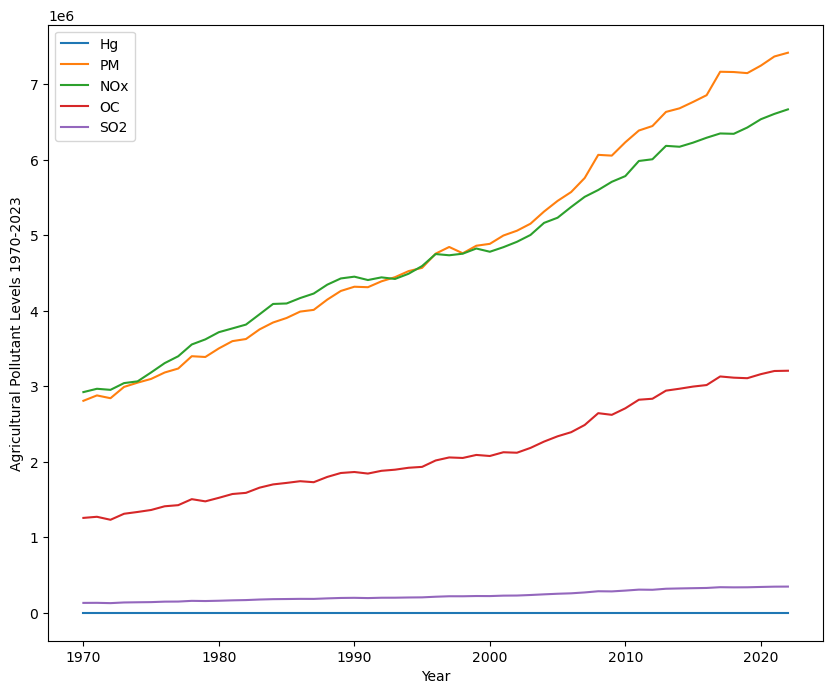

In [130]:
plt.figure(figsize=(10,8))
plt.plot(pol['Agriculture_Hg'], label='Hg')
plt.plot(pol['Agriculture_PM'], label='PM')
plt.plot(pol['Agriculture_NOx'], label='NOx')
plt.plot(pol['Agriculture_OC'], label='OC')
plt.plot(pol['Agriculture_SO2'], label='SO2')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Agricultural Pollutant Levels 1970-2023')
plt.show()

NOx and particulate matter levels have increased a lot since the 1970s. Organic carbon levels have also been trending upwards with SO2 and mercury levels remaining consistently low throughout this time period. This makes sense as growing agricultural needs and continued advancements lead to the widespread use of diesel powered farming equipment, NOx levels would be expected to rise. 

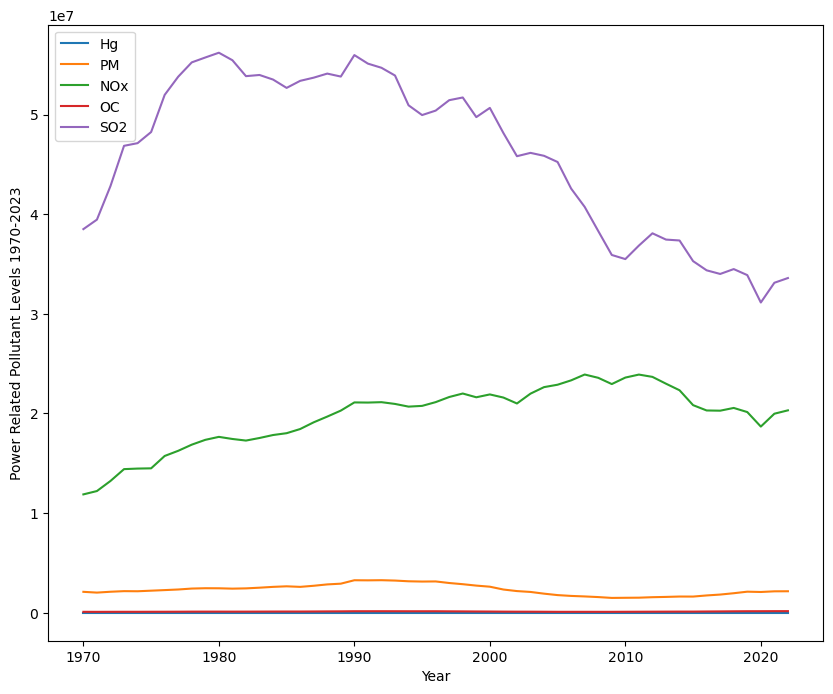

In [135]:
plt.figure(figsize=(10,8))
plt.plot(pol['Power industry_Hg'], label='Hg')
plt.plot(pol['Power industry_PM'], label='PM')
plt.plot(pol['Power industry_NOx'], label='NOx')
plt.plot(pol['Power industry_OC'], label='OC')
plt.plot(pol['Power industry_SO2'], label='SO2')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Power Related Pollutant Levels 1970-2023')
plt.show()

SO2 levels in relation to power production were greatest roughly between 1975-2005. The steep decline in SO2 production is promising, however, there seems to be an increase since 2020. This is a pollutant we must keep an eye out for, as SO2 levels contribute to acid rain and can greatly harm our ocean ecosystems. 

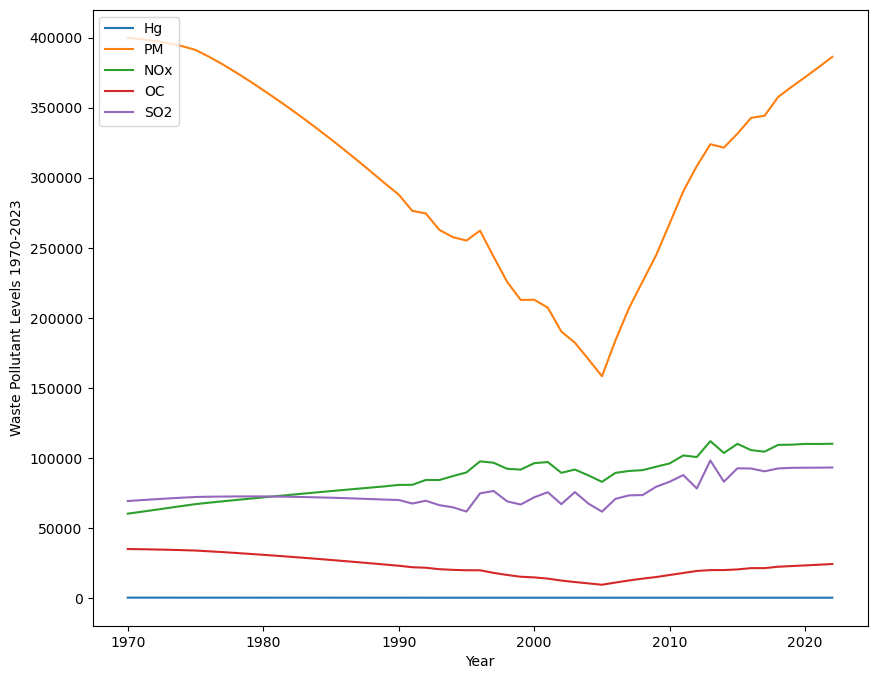

In [140]:
plt.figure(figsize=(10,8))
plt.plot(pol['Waste_Hg'], label='Hg')
plt.plot(pol['Waste_PM'], label='PM')
plt.plot(pol['Waste_NOx'], label='NOx')
plt.plot(pol['Waste_OC'], label='OC')
plt.plot(pol['Waste_SO2'], label='SO2')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Waste Pollutant Levels 1970-2023')
plt.show()

This is an incredibly interesting trend we have for the particulate matter caused by waste. Most other pollutants have little overall varaition, but particulate matter has a strong 'V' shaped patter. The lowest point on this line is around 2005. The values on the y axis are also very high. All pollutants are in the unit of metric tons, so this is very high compared to other grpahs. 

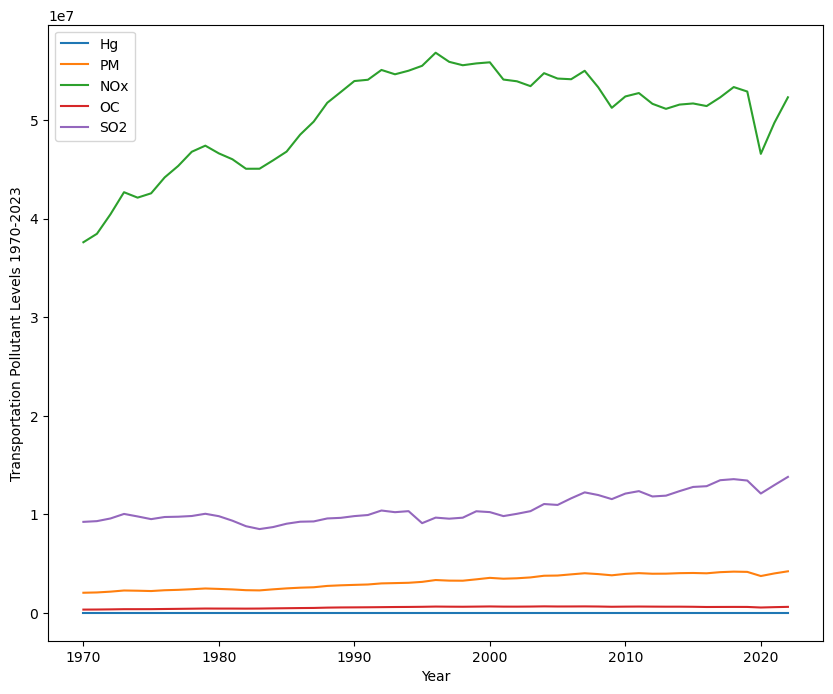

In [143]:
plt.figure(figsize=(10,8))
plt.plot(pol['Transport_Hg'], label='Hg')
plt.plot(pol['Transport_PM'], label='PM')
plt.plot(pol['Transport_NOx'], label='NOx')
plt.plot(pol['Transport_OC'], label='OC')
plt.plot(pol['Transport_SO2'], label='SO2')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Transportation Pollutant Levels 1970-2023')
plt.show()

NOx levels have been steadily climbing, with a brief yet sharp dip around the late 2010s. Could it be from electric cars becoming popularized? It is worth exploring. 

We're going to do two different merged dataframes. One will be the HDI and coral reef data merged on country. We will can see if any socioeconomic variables contribute to coral reef health. The second dataframe will be our pollutants and coral reef data. It will have the year as the index, we will be doing a time series analysis. This will helps us compare global pollution levels over time to coral reef health. From this we should be able to see what pollutants contribute the most to coral reef bleaching. 

In [197]:
hdi.columns

Index(['HDI Rank', 'Human Development Index (HDI) ',
       'Life expectancy at birth', 'Expected years of schooling',
       'Mean years of schooling', 'Gross national income (GNI) per capita',
       'GNI per capita rank minus HDI rank', 'HDI rank'],
      dtype='object')

In [207]:
hdi.reset_index(inplace=True) 
hdi.set_index('HDI Rank', inplace=True) 
hdi.head()

,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank
HDI Rank,,,,,,,,
1,Iceland,0.972,82.7,18.9,13.9,"69,117",12,3
2,Norway,0.970,83.3,18.8,13.1,"112,710",0,1
2,Switzerland,0.970,84.0,16.7,13.9,"81,949",5,2
4,Denmark,0.962,81.9,18.7,13.0,"76,008",4,4
5,Germany,0.959,81.4,17.3,14.3,"64,053",13,6


In [225]:
reef.columns

Index(['Latitude_Degrees', 'Longitude_Degrees', 'Country', 'Exposure',
       'Turbidity', 'Year', 'Depth_m', 'Substrate_Name', 'Percent_Bleaching',
       'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum',
       'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean'],
      dtype='object')

In [511]:
country = pd.merge(reef, hdi, on='Country', how='outer') 
country.head()

,Latitude_Degrees,Longitude_Degrees,Country,Exposure,Turbidity,Year,Depth_m,Substrate_Name,Percent_Bleaching,Temperature_Kelvin,...,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank
0,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.496,66.0,10.8,2.5,"1,972",-1,180
1,NaN,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.810,79.6,14.5,10.2,"17,627",16,70
2,NaN,NaN,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.763,76.3,15.5,7.4,"15,114",3,96
3,NaN,NaN,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.913,84.0,14.5,11.6,"64,631",-15,37
4,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.616,64.6,12.2,6.0,"6,631",-11,146


In [513]:
country = country[country['Exposure'].notna()]
country.head()

,Latitude_Degrees,Longitude_Degrees,Country,Exposure,Turbidity,Year,Depth_m,Substrate_Name,Percent_Bleaching,Temperature_Kelvin,...,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank
5,18.2206,-63.0686,Anguilla,Sheltered,0.0478,1987.0,nd,nd,nd,301.42,...,2.44,16.65,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,18.2484,-63.0511,Anguilla,Exposed,0.0,2002.0,5.5,Fleshy Seaweed,nd,301.83,...,2.34,13.31,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,18.2484,-63.0511,Anguilla,Exposed,0.0,2002.0,5.5,Hard Coral,nd,301.83,...,2.34,13.31,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,17.1684,-61.8183,Antigua and Barbuda,Sheltered,0.0708,2004.0,8,Hard Coral,0,302.48,...,2.71,18.89,1.43,0.851,77.6,15.5,11.6,"27,387",10,51
9,17.1684,-61.8183,Antigua and Barbuda,Sheltered,0.0708,2004.0,8,Nutrient Indicator Algae,0,302.48,...,2.71,18.89,1.43,0.851,77.6,15.5,11.6,"27,387",10,51


In [515]:
country = country[country['Human Development Index (HDI) '].notna()]
country.head()

,Latitude_Degrees,Longitude_Degrees,Country,Exposure,Turbidity,Year,Depth_m,Substrate_Name,Percent_Bleaching,Temperature_Kelvin,...,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank
8,17.1684,-61.8183,Antigua and Barbuda,Sheltered,0.0708,2004.0,8,Hard Coral,0,302.48,...,2.71,18.89,1.43,0.851,77.6,15.5,11.6,"27,387",10,51
9,17.1684,-61.8183,Antigua and Barbuda,Sheltered,0.0708,2004.0,8,Nutrient Indicator Algae,0,302.48,...,2.71,18.89,1.43,0.851,77.6,15.5,11.6,"27,387",10,51
10,17.7353,-61.8522,Antigua and Barbuda,Exposed,0.0758,2003.0,5,Hard Coral,5.0,300.79,...,2.49,16.89,1.44,0.851,77.6,15.5,11.6,"27,387",10,51
11,17.7353,-61.8522,Antigua and Barbuda,Exposed,0.0758,2003.0,5,Nutrient Indicator Algae,5.0,300.79,...,2.49,16.89,1.44,0.851,77.6,15.5,11.6,"27,387",10,51
12,17.0675,-61.6653,Antigua and Barbuda,Exposed,0.031,2003.0,5,Hard Coral,40,301.38,...,2.43,15.32,1.23,0.851,77.6,15.5,11.6,"27,387",10,51


In [517]:
country.shape

(35189, 34)

In [519]:
le = LabelEncoder()
country['Exposure'] = le.fit_transform(country['Exposure'])
label= dict(zip(le.classes_, le.transform(le.classes_)))

country['Substrate_Name'] = le.fit_transform(country['Substrate_Name'])
label2 = dict(zip(le.classes_, le.transform(le.classes_)))

country['Country'] = le.fit_transform(country['Country'])
label3 = dict(zip(le.classes_, le.transform(le.classes_)))

country = country.apply(pd.to_numeric, errors='coerce') 
labels1 = {'Exposure': label,'Substrate_Name': label2, 'Country': label3}

print(labels1) 
country.head()

{'Exposure': {'Exposed': 0, 'Sheltered': 1, 'Sometimes': 2}, 'Substrate_Name': {'Fleshy Seaweed': 0, 'Hard Coral': 1, 'Nutrient Indicator Algae': 2, 'nd': 3}, 'Country': {'Antigua and Barbuda': 0, 'Australia': 1, 'Bahamas': 2, 'Bahrain': 3, 'Bangladesh': 4, 'Barbados': 5, 'Belize': 6, 'Brazil': 7, 'Cambodia': 8, 'Chile': 9, 'China': 10, 'Colombia': 11, 'Costa Rica': 12, 'Cuba': 13, 'Djibouti': 14, 'Dominica': 15, 'Dominican Republic': 16, 'Ecuador': 17, 'Egypt': 18, 'Eritrea': 19, 'Fiji': 20, 'France': 21, 'Grenada': 22, 'Guatemala': 23, 'Haiti': 24, 'Honduras': 25, 'India': 26, 'Indonesia': 27, 'Israel': 28, 'Jamaica': 29, 'Japan': 30, 'Jordan': 31, 'Kenya': 32, 'Kiribati': 33, 'Kuwait': 34, 'Madagascar': 35, 'Malaysia': 36, 'Maldives': 37, 'Marshall Islands': 38, 'Mauritius': 39, 'Mexico': 40, 'Mozambique': 41, 'Myanmar': 42, 'Nicaragua': 43, 'Oman': 44, 'Palau': 45, 'Panama': 46, 'Papua New Guinea': 47, 'Philippines': 48, 'Saint Kitts and Nevis': 49, 'Saint Lucia': 50, 'Saint Vincen

,Latitude_Degrees,Longitude_Degrees,Country,Exposure,Turbidity,Year,Depth_m,Substrate_Name,Percent_Bleaching,Temperature_Kelvin,...,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank
8,17.1684,-61.8183,0,1,0.0708,2004.0,8.0,1,0.0,302.48,...,2.71,18.89,1.43,0.851,77.6,15.5,11.6,NaN,10,51
9,17.1684,-61.8183,0,1,0.0708,2004.0,8.0,2,0.0,302.48,...,2.71,18.89,1.43,0.851,77.6,15.5,11.6,NaN,10,51
10,17.7353,-61.8522,0,0,0.0758,2003.0,5.0,1,5.0,300.79,...,2.49,16.89,1.44,0.851,77.6,15.5,11.6,NaN,10,51
11,17.7353,-61.8522,0,0,0.0758,2003.0,5.0,2,5.0,300.79,...,2.49,16.89,1.44,0.851,77.6,15.5,11.6,NaN,10,51
12,17.0675,-61.6653,0,0,0.0310,2003.0,5.0,1,40.0,301.38,...,2.43,15.32,1.23,0.851,77.6,15.5,11.6,NaN,10,51


In [521]:
print(labels1['Country'])

{'Antigua and Barbuda': 0, 'Australia': 1, 'Bahamas': 2, 'Bahrain': 3, 'Bangladesh': 4, 'Barbados': 5, 'Belize': 6, 'Brazil': 7, 'Cambodia': 8, 'Chile': 9, 'China': 10, 'Colombia': 11, 'Costa Rica': 12, 'Cuba': 13, 'Djibouti': 14, 'Dominica': 15, 'Dominican Republic': 16, 'Ecuador': 17, 'Egypt': 18, 'Eritrea': 19, 'Fiji': 20, 'France': 21, 'Grenada': 22, 'Guatemala': 23, 'Haiti': 24, 'Honduras': 25, 'India': 26, 'Indonesia': 27, 'Israel': 28, 'Jamaica': 29, 'Japan': 30, 'Jordan': 31, 'Kenya': 32, 'Kiribati': 33, 'Kuwait': 34, 'Madagascar': 35, 'Malaysia': 36, 'Maldives': 37, 'Marshall Islands': 38, 'Mauritius': 39, 'Mexico': 40, 'Mozambique': 41, 'Myanmar': 42, 'Nicaragua': 43, 'Oman': 44, 'Palau': 45, 'Panama': 46, 'Papua New Guinea': 47, 'Philippines': 48, 'Saint Kitts and Nevis': 49, 'Saint Lucia': 50, 'Saint Vincent and the Grenadines': 51, 'Samoa': 52, 'Saudi Arabia': 53, 'Seychelles': 54, 'Singapore': 55, 'Solomon Islands': 56, 'South Africa': 57, 'Sri Lanka': 58, 'Sudan': 59, 'T

In [523]:
country.isna().sum()

Latitude_Degrees                              0
Longitude_Degrees                             0
Country                                       0
Exposure                                      0
Turbidity                                     6
Year                                          0
Depth_m                                    1691
Substrate_Name                                0
Percent_Bleaching                          4957
Temperature_Kelvin                          106
Temperature_Mean                             90
Temperature_Minimum                          90
Temperature_Maximum                          90
Temperature_Kelvin_Standard_Deviation        90
SSTA                                        106
SSTA_Standard_Deviation                      90
SSTA_Mean                                    90
SSTA_Minimum                                134
SSTA_Maximum                                 90
SSTA_Frequency                              106
SSTA_Frequency_Standard_Deviation       

In [525]:
country.shape

(35189, 34)

In [527]:
country['Percent_Bleaching'] = country['Percent_Bleaching'].fillna(0)
country.drop('Depth_m', axis=1, inplace=True) 
country = country[country['Temperature_Kelvin'].notna()]

In [529]:
country.isnull().sum()

Latitude_Degrees                              0
Longitude_Degrees                             0
Country                                       0
Exposure                                      0
Turbidity                                     0
Year                                          0
Substrate_Name                                0
Percent_Bleaching                             0
Temperature_Kelvin                            0
Temperature_Mean                              0
Temperature_Minimum                           0
Temperature_Maximum                           0
Temperature_Kelvin_Standard_Deviation         0
SSTA                                          0
SSTA_Standard_Deviation                       0
SSTA_Mean                                     0
SSTA_Minimum                                 44
SSTA_Maximum                                  0
SSTA_Frequency                                0
SSTA_Frequency_Standard_Deviation             0
SSTA_FrequencyMax                       

In [531]:
country.drop('Gross national income (GNI) per capita', axis=1, inplace=True) 
country['SSTA_Minimum'] = country['SSTA_Minimum'].fillna(country['SSTA_Minimum'].mean())

In [533]:
country.isnull().sum()

Latitude_Degrees                         0
Longitude_Degrees                        0
Country                                  0
Exposure                                 0
Turbidity                                0
Year                                     0
Substrate_Name                           0
Percent_Bleaching                        0
Temperature_Kelvin                       0
Temperature_Mean                         0
Temperature_Minimum                      0
Temperature_Maximum                      0
Temperature_Kelvin_Standard_Deviation    0
SSTA                                     0
SSTA_Standard_Deviation                  0
SSTA_Mean                                0
SSTA_Minimum                             0
SSTA_Maximum                             0
SSTA_Frequency                           0
SSTA_Frequency_Standard_Deviation        0
SSTA_FrequencyMax                        0
SSTA_FrequencyMean                       0
SSTA_DHW                                 0
SSTA_DHW_St

Let's make out second table. 

In [336]:
pol.columns

Index(['Agriculture_Hg', 'Buildings_Hg', 'Power industry_Hg', 'Transport_Hg',
       'Waste_Hg', 'Other industrial combustion_Hg', 'Other_Hg',
       'Agriculture_PM', 'Buildings_PM', 'Power industry_PM', 'Transport_PM',
       'Waste_PM', 'Other industrial combustion_PM', 'Other_PM',
       'Agriculture_NOx', 'Buildings_NOx', 'Power industry_NOx',
       'Transport_NOx', 'Waste_NOx', 'Other industrial combustion_NOx',
       'Other_NOx', 'Agriculture_OC', 'Buildings_OC', 'Power industry_OC',
       'Transport_OC', 'Waste_OC', 'Other industrial combustion_OC',
       'Other_OC', 'Agriculture_SO2', 'Buildings_SO2', 'Power industry_SO2',
       'Transport_SO2', 'Waste_SO2', 'Other industrial combustion_SO2',
       'Other_SO2'],
      dtype='object')

In [256]:
reef.columns

Index(['Latitude_Degrees', 'Longitude_Degrees', 'Country', 'Exposure',
       'Turbidity', 'Year', 'Depth_m', 'Substrate_Name', 'Percent_Bleaching',
       'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum',
       'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean'],
      dtype='object')

In [482]:
world = pd.merge(pol, reef, on='Year', how='inner') 
world.head() 

,Year,Agriculture_Hg,Buildings_Hg,Power industry_Hg,Transport_Hg,Waste_Hg,Other industrial combustion_Hg,Other_Hg,Agriculture_PM,Buildings_PM,...,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean
0,1980,0.0,6.16,61.53,3.81,72.76,29.06,96.45,3502101.73,20451526.32,...,-2.78,3.61,nd,3.59,20,3,nd,2.15,18.06,1.09
1,1980,0.0,6.16,61.53,3.81,72.76,29.06,96.45,3502101.73,20451526.32,...,-3.11,3.95,nd,3.69,20,7,nd,4.53,26.73,3.18
2,1983,0.0,6.29,64.96,3.64,66.27,28.69,89.36,3753672.91,21295890.11,...,-3.25,2.69,5,4.58,23,4,4.41,2.68,18.24,1.51
3,1983,0.0,6.29,64.96,3.64,66.27,28.69,89.36,3753672.91,21295890.11,...,-3.00,3.49,14,7.79,36,6,13.12,4.01,23.05,2.14
4,1983,0.0,6.29,64.96,3.64,66.27,28.69,89.36,3753672.91,21295890.11,...,-3.11,2.9,1,4.49,22,4,0,2.43,13.47,1.46


In [484]:
world.dtypes

Year                             int64
Agriculture_Hg                 float64
Buildings_Hg                   float64
Power industry_Hg              float64
Transport_Hg                   float64
                                ...   
SSTA_FrequencyMean              object
SSTA_DHW                        object
SSTA_DHW_Standard_Deviation     object
SSTA_DHWMax                     object
SSTA_DHWMean                    object
Length: 62, dtype: object

In [486]:
world.columns

Index(['Year', 'Agriculture_Hg', 'Buildings_Hg', 'Power industry_Hg',
       'Transport_Hg', 'Waste_Hg', 'Other industrial combustion_Hg',
       'Other_Hg', 'Agriculture_PM', 'Buildings_PM', 'Power industry_PM',
       'Transport_PM', 'Waste_PM', 'Other industrial combustion_PM',
       'Other_PM', 'Agriculture_NOx', 'Buildings_NOx', 'Power industry_NOx',
       'Transport_NOx', 'Waste_NOx', 'Other industrial combustion_NOx',
       'Other_NOx', 'Agriculture_OC', 'Buildings_OC', 'Power industry_OC',
       'Transport_OC', 'Waste_OC', 'Other industrial combustion_OC',
       'Other_OC', 'Agriculture_SO2', 'Buildings_SO2', 'Power industry_SO2',
       'Transport_SO2', 'Waste_SO2', 'Other industrial combustion_SO2',
       'Other_SO2', 'Latitude_Degrees', 'Longitude_Degrees', 'Country',
       'Exposure', 'Turbidity', 'Depth_m', 'Substrate_Name',
       'Percent_Bleaching', 'Temperature_Kelvin', 'Temperature_Mean',
       'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_

In [488]:
world.drop(['Country', 'Turbidity'], axis=1, inplace=True) 

Let's go ahead and encode our categorical columns for the 'world' df. 

In [491]:
world['Substrate_Name']=world['Substrate_Name'].fillna('nd') 

In [493]:
le = LabelEncoder()
world['Exposure'] = le.fit_transform(world['Exposure'])
labels1= dict(zip(le.classes_, le.transform(le.classes_)))
world['Substrate_Name'] = le.fit_transform(world['Substrate_Name'])
labels2 = dict(zip(le.classes_, le.transform(le.classes_)))
world = world.apply(pd.to_numeric, errors='coerce') 
labels = {'Exposure': labels1,'Substrate_Name': labels2}
print(labels) 
world.head()

{'Exposure': {'Exposed': 0, 'Sheltered': 1, 'Sometimes': 2}, 'Substrate_Name': {'Fleshy Seaweed': 0, 'Hard Coral': 1, 'Nutrient Indicator Algae': 2, 'nd': 3}}


,Year,Agriculture_Hg,Buildings_Hg,Power industry_Hg,Transport_Hg,Waste_Hg,Other industrial combustion_Hg,Other_Hg,Agriculture_PM,Buildings_PM,...,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean
0,1980,0.0,6.16,61.53,3.81,72.76,29.06,96.45,3502101.73,20451526.32,...,-2.78,3.61,NaN,3.59,20.0,3.0,NaN,2.15,18.06,1.09
1,1980,0.0,6.16,61.53,3.81,72.76,29.06,96.45,3502101.73,20451526.32,...,-3.11,3.95,NaN,3.69,20.0,7.0,NaN,4.53,26.73,3.18
2,1983,0.0,6.29,64.96,3.64,66.27,28.69,89.36,3753672.91,21295890.11,...,-3.25,2.69,5.0,4.58,23.0,4.0,4.41,2.68,18.24,1.51
3,1983,0.0,6.29,64.96,3.64,66.27,28.69,89.36,3753672.91,21295890.11,...,-3.00,3.49,14.0,7.79,36.0,6.0,13.12,4.01,23.05,2.14
4,1983,0.0,6.29,64.96,3.64,66.27,28.69,89.36,3753672.91,21295890.11,...,-3.11,2.90,1.0,4.49,22.0,4.0,0.00,2.43,13.47,1.46


By applying 'pd.to_numeric' to the 'world' df, we got rid of the 'nd' entries. 'Labels' shows the encoded values and their original labels. 

In [496]:
world.isnull().sum()

Year                                        0
Agriculture_Hg                              0
Buildings_Hg                                0
Power industry_Hg                           0
Transport_Hg                                0
Waste_Hg                                    0
Other industrial combustion_Hg              0
Other_Hg                                    0
Agriculture_PM                              0
Buildings_PM                                0
Power industry_PM                           0
Transport_PM                                0
Waste_PM                                    0
Other industrial combustion_PM              0
Other_PM                                    0
Agriculture_NOx                             0
Buildings_NOx                               0
Power industry_NOx                          0
Transport_NOx                               0
Waste_NOx                                   0
Other industrial combustion_NOx             0
Other_NOx                         

We have a substantial amount of NaN entries for 'Percent_Bleaching' and 'Depth_m'. The temperature section of the df almost all have the same number of NaNs, we can assume it's the same rows. We will just remove those rows.'Percent_Bleaching seems to be our main variable in determining coral reef health, so I don't think we should remove it. We will fill all NaN entries for this column with 0. We will remove the depth column as well. 

In [499]:
world.drop('Depth_m', axis=1, inplace=True)
world['Percent_Bleaching'] = world['Percent_Bleaching'].fillna(0)

In [501]:
world.isnull().sum()

Year                                       0
Agriculture_Hg                             0
Buildings_Hg                               0
Power industry_Hg                          0
Transport_Hg                               0
Waste_Hg                                   0
Other industrial combustion_Hg             0
Other_Hg                                   0
Agriculture_PM                             0
Buildings_PM                               0
Power industry_PM                          0
Transport_PM                               0
Waste_PM                                   0
Other industrial combustion_PM             0
Other_PM                                   0
Agriculture_NOx                            0
Buildings_NOx                              0
Power industry_NOx                         0
Transport_NOx                              0
Waste_NOx                                  0
Other industrial combustion_NOx            0
Other_NOx                                  0
Agricultur

In [503]:
world = world[world['Temperature_Kelvin'].notna()]

In [505]:
world['SSTA_Minimum'] = world['SSTA_Minimum'].fillna(world['SSTA_Minimum'].mean())

In [507]:
world.isnull().sum()

Year                                     0
Agriculture_Hg                           0
Buildings_Hg                             0
Power industry_Hg                        0
Transport_Hg                             0
Waste_Hg                                 0
Other industrial combustion_Hg           0
Other_Hg                                 0
Agriculture_PM                           0
Buildings_PM                             0
Power industry_PM                        0
Transport_PM                             0
Waste_PM                                 0
Other industrial combustion_PM           0
Other_PM                                 0
Agriculture_NOx                          0
Buildings_NOx                            0
Power industry_NOx                       0
Transport_NOx                            0
Waste_NOx                                0
Other industrial combustion_NOx          0
Other_NOx                                0
Agriculture_OC                           0
Buildings_O

In [535]:
print(country.dtypes)
print(world.dtypes)

Latitude_Degrees                         float64
Longitude_Degrees                        float64
Country                                    int32
Exposure                                   int32
Turbidity                                float64
Year                                     float64
Substrate_Name                             int32
Percent_Bleaching                        float64
Temperature_Kelvin                       float64
Temperature_Mean                         float64
Temperature_Minimum                      float64
Temperature_Maximum                      float64
Temperature_Kelvin_Standard_Deviation    float64
SSTA                                     float64
SSTA_Standard_Deviation                  float64
SSTA_Mean                                float64
SSTA_Minimum                             float64
SSTA_Maximum                             float64
SSTA_Frequency                           float64
SSTA_Frequency_Standard_Deviation        float64
SSTA_FrequencyMax   

All values are now numeric and there are no NaNs. We can start visualizing our data. 

In [541]:
country.columns

Index(['Latitude_Degrees', 'Longitude_Degrees', 'Country', 'Exposure',
       'Turbidity', 'Year', 'Substrate_Name', 'Percent_Bleaching',
       'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum',
       'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean',
       'Human Development Index (HDI) ', 'Life expectancy at birth',
       'Expected years of schooling', 'Mean years of schooling',
       'GNI per capita rank minus HDI rank', 'HDI rank'],
      dtype='object')

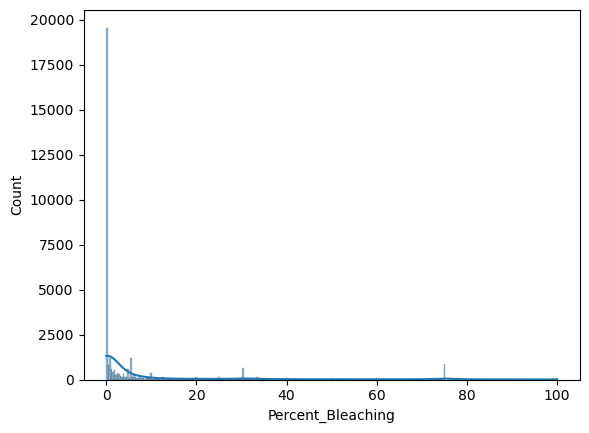

In [538]:
sns.histplot(country['Percent_Bleaching'], kde=True)
plt.show()

We made our NaN values for percent bleaching 0, so that may have altered the actual percentage of bleaching a bit.

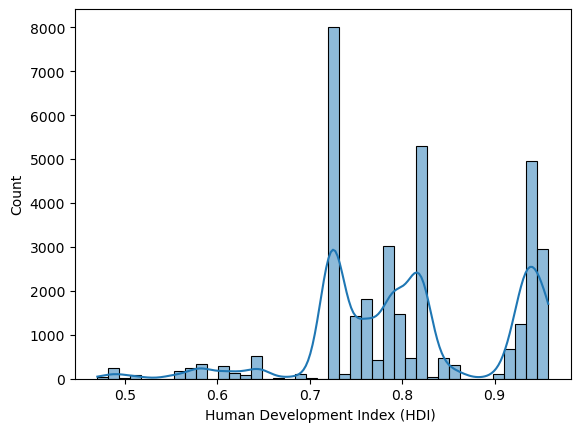

In [543]:
sns.histplot(country['Human Development Index (HDI) '], kde=True)
plt.show()

Countries listed have data for coral reefs. We can see that most of these countries have a higher HDI. 

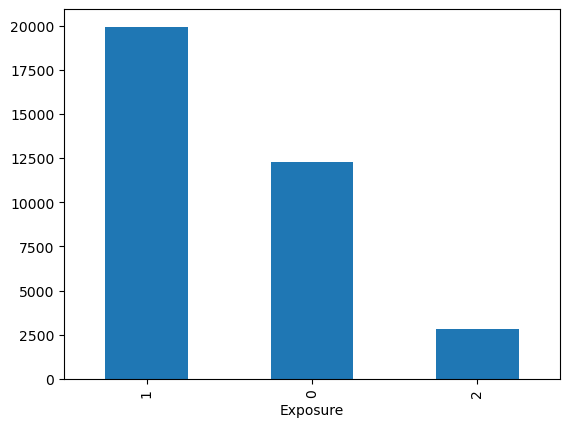

In [549]:
country['Exposure'].value_counts().plot(kind='bar')
plt.show()

In [551]:
print(labels1['Exposure'])

{'Exposed': 0, 'Sheltered': 1, 'Sometimes': 2}


Most reefs are exposed. 

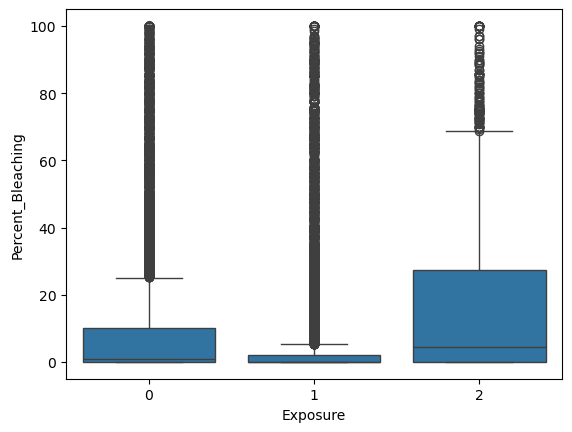

In [554]:
sns.boxplot(x='Exposure', y='Percent_Bleaching', data=country)
plt.show()

We have a lot of outliers for the percentage of bleaching seen in each reef, but most seem lie between 0-30 percent. Outliers are expected in this case. 

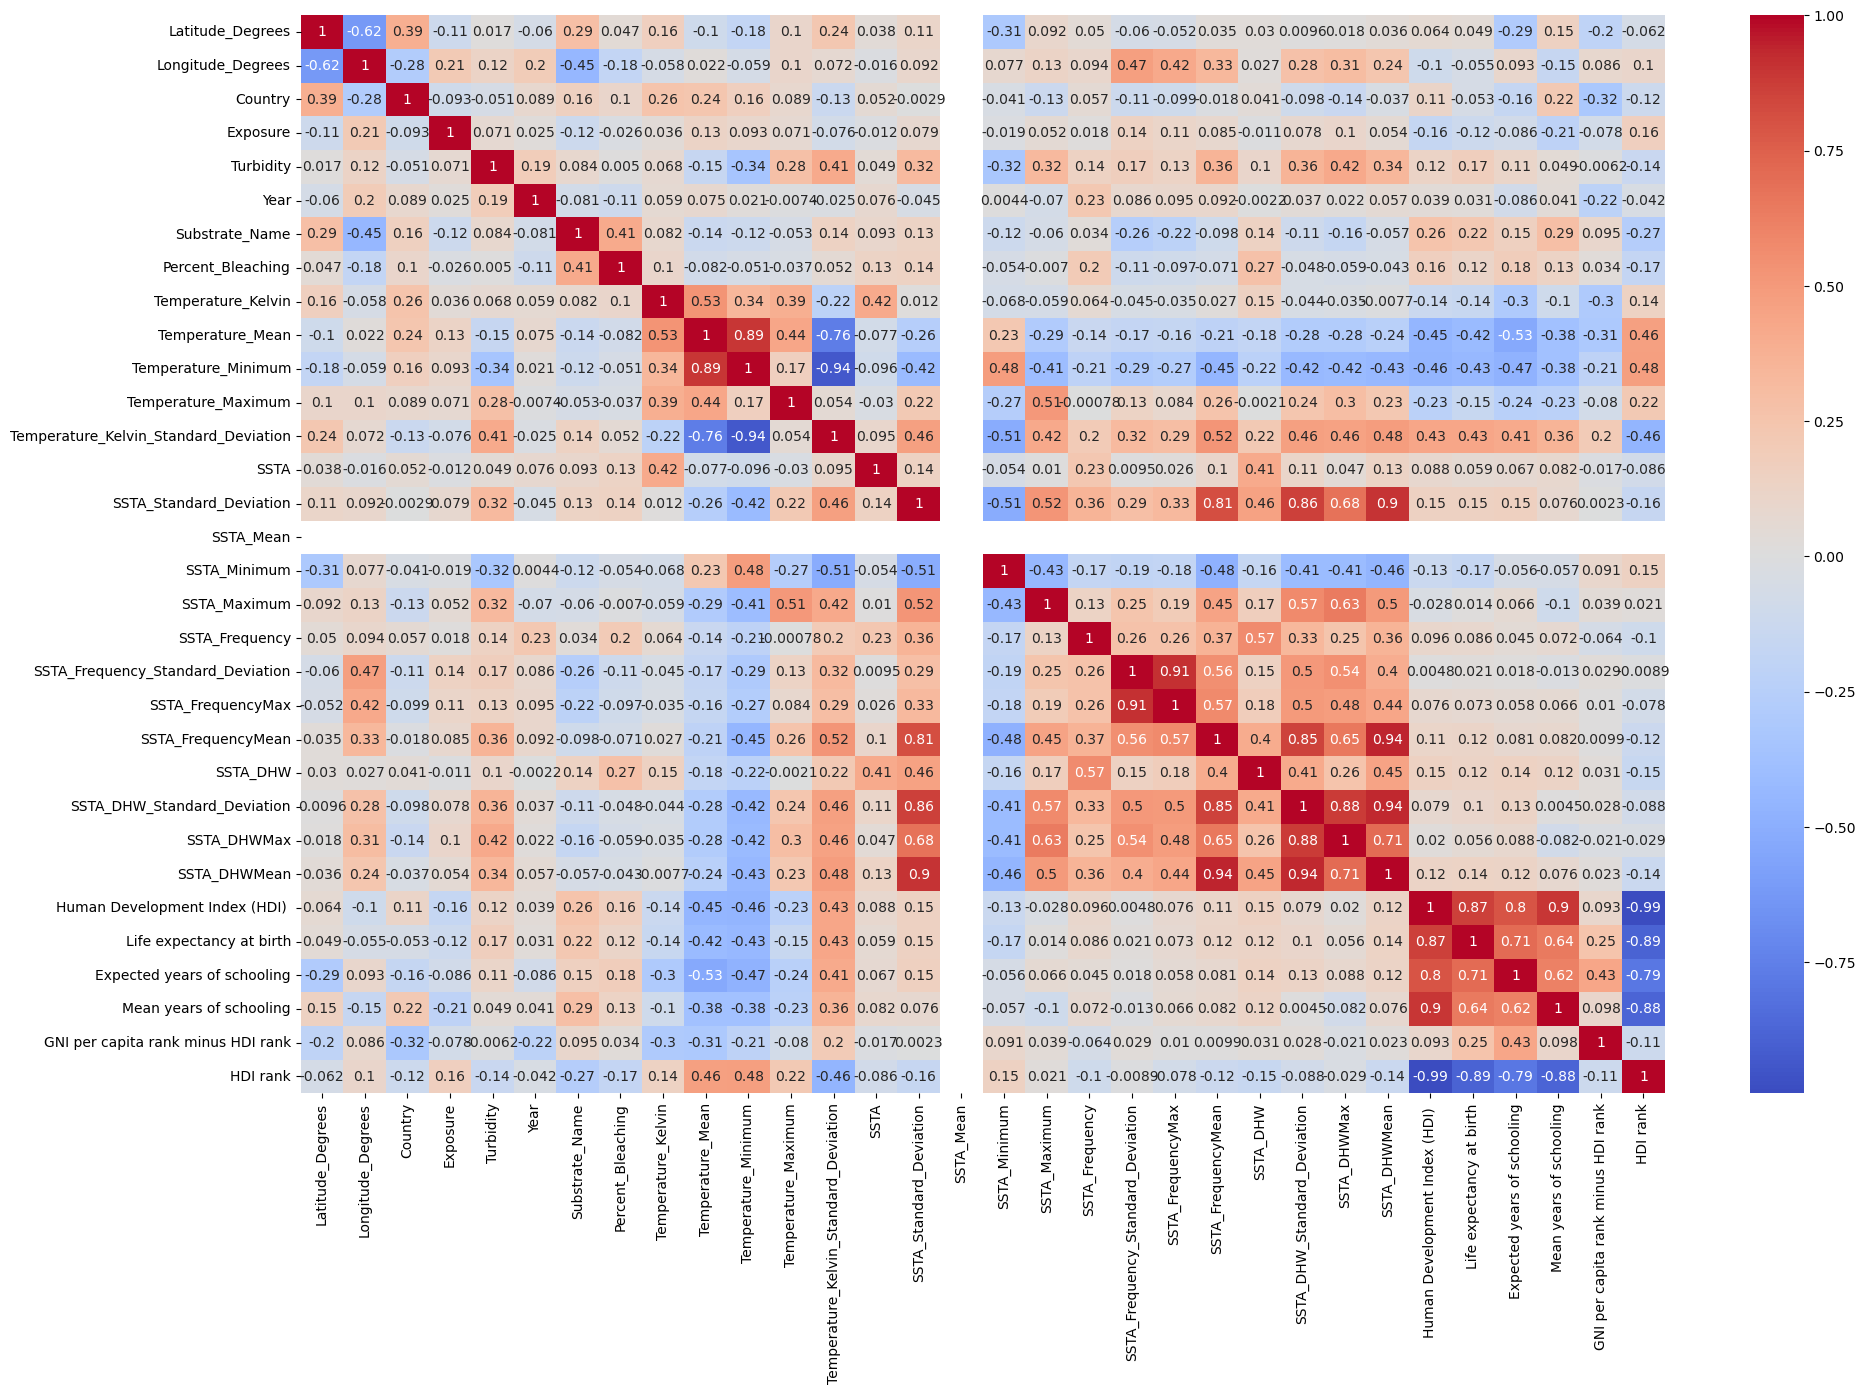

In [562]:
corr = country.corr()
plt.figure(figsize=(22,14))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

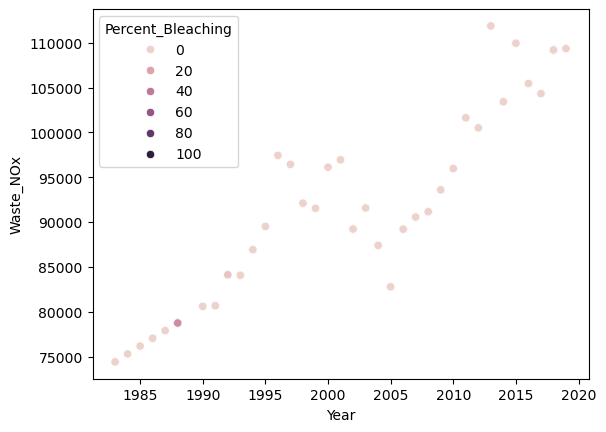

In [575]:
sns.scatterplot(x='Year', y='Waste_NOx', hue='Percent_Bleaching', data=world)
plt.show()

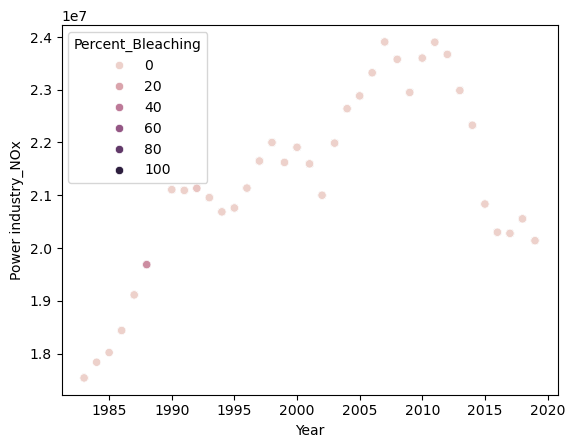

In [581]:
sns.scatterplot(x='Year', y='Power industry_NOx', hue='Percent_Bleaching', data=world)
plt.show()

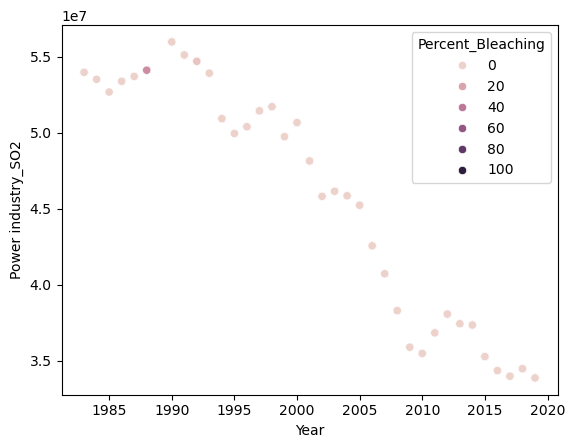

In [583]:
sns.scatterplot(x='Year', y='Power industry_SO2', hue='Percent_Bleaching', data=world)
plt.show()

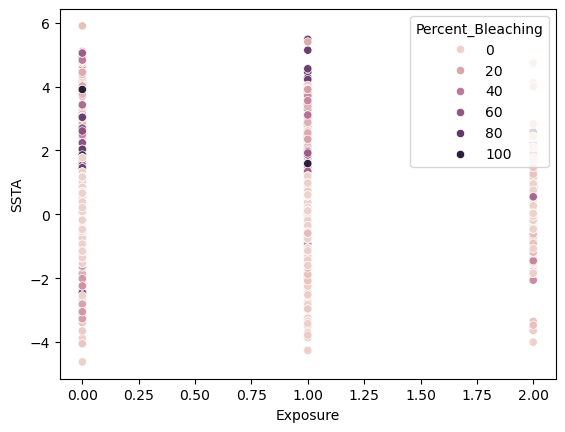

In [591]:
sns.scatterplot(x='Exposure', y='SSTA', hue='Percent_Bleaching', data=country)
plt.show()

As the SSTA, or the number of times the temperature is not the average for the area, increases so does the percent of bleaching. Maybe variability of the temperature matters more than average temperature itself. 

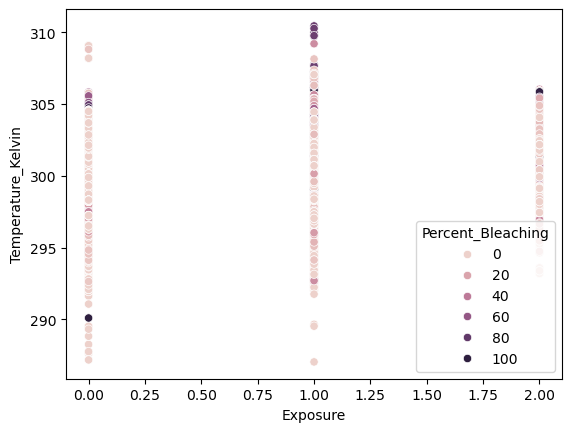

In [598]:
sns.scatterplot(x='Exposure', y='Temperature_Kelvin', hue='Percent_Bleaching', data=country)
plt.show()

Bleaching still rises with increasing temperature, but not as much as when the SSTA instances goes up. 

When temperature rises in sheltered reefs, the bleaching is more profound than the exposed reefs. The sheltered reefs may have a greater temperature incease compared to exposed reefs. This is supported by the last scatter plot. 

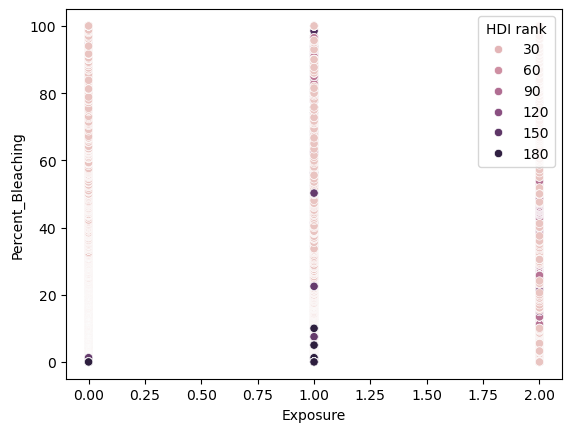

In [605]:
sns.scatterplot(x='Exposure', y='Percent_Bleaching', hue='HDI rank', data=country)
plt.show()

Countries with lower HDI ranks have better bleaching percentages. Could this be from less manufacturing? 

In [611]:
world.columns

Index(['Year', 'Agriculture_Hg', 'Buildings_Hg', 'Power industry_Hg',
       'Transport_Hg', 'Waste_Hg', 'Other industrial combustion_Hg',
       'Other_Hg', 'Agriculture_PM', 'Buildings_PM', 'Power industry_PM',
       'Transport_PM', 'Waste_PM', 'Other industrial combustion_PM',
       'Other_PM', 'Agriculture_NOx', 'Buildings_NOx', 'Power industry_NOx',
       'Transport_NOx', 'Waste_NOx', 'Other industrial combustion_NOx',
       'Other_NOx', 'Agriculture_OC', 'Buildings_OC', 'Power industry_OC',
       'Transport_OC', 'Waste_OC', 'Other industrial combustion_OC',
       'Other_OC', 'Agriculture_SO2', 'Buildings_SO2', 'Power industry_SO2',
       'Transport_SO2', 'Waste_SO2', 'Other industrial combustion_SO2',
       'Other_SO2', 'Latitude_Degrees', 'Longitude_Degrees', 'Exposure',
       'Substrate_Name', 'Percent_Bleaching', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'SSTA',
      

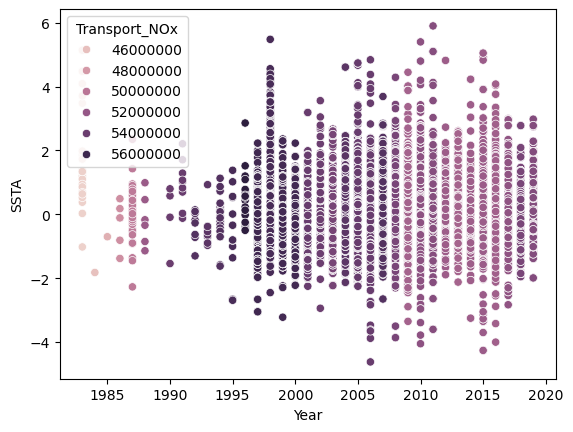

In [619]:
sns.scatterplot(x='Year', y='SSTA', hue='Transport_NOx', data=world)
plt.show()

This one is interesting! Over time we see an increase in NOx pollutant and much more variability in temperature. 

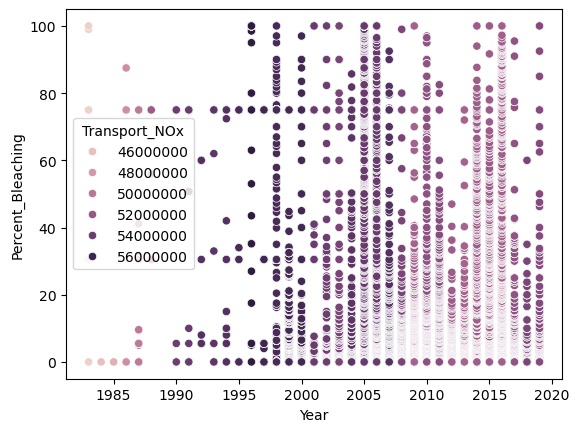

In [624]:
sns.scatterplot(x='Year', y='Percent_Bleaching', hue='Transport_NOx', data=world)
plt.show()

This graph supports the idea that increasing pollutants contribute to the bleaching of coral reefs. We can explore which pollutants specifically contribute the most in the modeling section. 

I would also like to explore HDI and percent of bleaching. It seems that the lower the HDI, the less bleaching is observed. 

In [630]:
world.to_csv('world.csv', index=False)
country.to_csv('country.csv', index=False)